# Exercise Seven: Textual Analysis

In this exercise, I took the subheadings supplied to help organize and format, code, and draw inspiration and support from the referred text to continue the documented notebook to bring in viable and researchable textual analysis toward the strength of a collection of written texts (aka multi-document corpus).

In this weeks journey, the workflow explored the focuses below:

- (Stage #1) Import at least three documents you would like to compare (from text files, or using another format for a challenge.)
- (Stage #2) Preprocess the text and create a tokenized corpus from the text of the imported documents.
- (Stage #3) Create a document term matrix to enable comparative textual analysis across the full set of documents
- (Stage #4) Chart at least one comparison between the documents, using word frequency to map the text
- (Stage #5) Calculate the Euclidean distance between the documents, using two key words as the point of comparison
- As a (Bonus Challenge), consider trying one of the other types of distance modeling described in the text.)



## Stage One - Import at least three documents you would like to compare (from text files, or using another format for a challenge.)

I went into the referenced resource (Project Gutenberg) presented in class and started to explore.  Using a search of just film, I was able to come across many inviting titles to use to fulfill a viable area of reference for enhancing and expanding upon my notebook, such as the "Twelve Stories and a Dream" of H.G. Wells to Night of the Living Dead of George A. Romero, both of which just from their titles granted immediate interest due to the upcoming holiday and to their established notoriety as film influencers. The code direction below allowed the resources to become organized alphabetically and logged into the project using shortened titles from the .txt files downloaded. To name the documents, I was drawn to using interest in unique words and text. And with the use of OS or observational conversation tool, I decided to streamline down to just eight titles from 16 to help the visualizer within this portal become more presentable and streamlined by navigating between them toward the interest of film topics and subjects found within the folder housing the collection of .txt files.

- Several Different Atomic Detonations (atomic.txt)
- Behind the Screen (behind.txt)
- The Moving Picture Boys on the War Front (boys.txt)
- The Film of Fear (fear.txt)
- Night of the Living Dead (living.txt)
- The Film Mystery (mystery.txt)
- A Camera Actress in the Wilds of Togoland (togoland.txt)
- Twelve Stories and a Dream (wells.txt)


In [26]:
import nltk
import nltk.tokenize

# download the most recent punkt package
nltk.download('punkt', quiet=True)

import os
documents = []
titles =[]
path = 'Films/'
with os.scandir(path) as entries:
    for entry in entries:
        print(entry.name)
        f = open(f'{path}\{entry.name}',encoding='utf-8')
        text = f.read()
        documents.append(text)
        titles.append(entry.name)
print(titles[1])
print(documents[1][0:100])

atomic.txt
behind.txt
boys.txt
fear.txt
living.txt
mystery.txt
togoland.txt
wells.txt
behind.txt
﻿The Project Gutenberg EBook of Behind the Screen, by Samuel Goldwyn

This eBook is for the use of a


## Stage Two - Preprocess the text and create a tokenized corpus from the text of the imported documents


The process attained with this segmented coding helped remove repetitions of punctuation distractions by filtration of "non-punctuation tokens" (Karsdopp, Kestemont, Riddell 84).  Where implementing the function code of PUNCT_RE = re.compile(), enabled for identificational aspects geared toward seeing if an "input string is either a single punctuation marker or a sequence" (84). Accompanied with the use of [^\w\s]+$, it ensures that "a string is only matched if it solely consists of punctuation characters" (84).  Lastly, utilizing  is_punct(string) guided the process by identifying that non-punctuation tokens could be utilized toward success by incorporating a loop/list. Which interestingly ended with a print(tokenized[0][11]) as presented united. All of this brings us back to the tokenized vocabulary benefits of establishing a viable dictionary to explore and use.

In [27]:
import re
PUNCT_RE = re.compile(r'[^\w\s]+$')

def is_punct(string):
    """Check if STRING is a punctuation marker or a sequence of
       punctuation markers.
    """
    return PUNCT_RE.match(string) is not None
def preprocess_text(text, language, lowercase=True):
    """Preprocess a text.

    Perform a text preprocessing procedure, which transforms a string
    object into a list of word tokens without punctuation markers.

    """
    if lowercase:
        text = text.lower()
    tokens = nltk.tokenize.word_tokenize(text, language=language)
    tokens = [token for token in tokens if not is_punct(token)]
    return tokens
tokenized = []
for text in documents:
    tokenized.append(preprocess_text(text, "english"))

print(tokenized[0][11])

united


## Stage Three: Create a document term matrix to enable comparative textual analysis across the full set of documents

Bringing in a document term matrix enabled a viable mode of textual analysis that would represent a reason and expansion through the entire listed and introduced data attained to have an opportunity to be compared correctly and openly, as a whole set. Enveloping the format to use the function code of extract_vocabulary() enables a concise way to extract components included in the vocabulary of "a tokenized corpus given a minimum and a  maximum frequency count" (Karsdopp, Kestemont, Riddell 87). This coded use helps the amount and size be put through a filter to reduce using finding locational thresholds and allowances of code, which prepares our dictionary of choice to become counted within use or appearance of words presented.

In [23]:
def extract_vocabulary(tokenized_corpus, min_count=1, max_count=float('inf')):
    """Extract a vocabulary from a tokenized corpus.

    Arguments:
        tokenized_corpus (list): a tokenized corpus represented, list
            of lists of strings.
        min_count (int, optional): the minimum occurrence count of a
            vocabulary item in the corpus.
        max_count (int, optional): the maximum occurrence count of a
            vocabulary item in the corpus. Defaults to inf.

    Returns:
        list: An alphabetically ordered list of unique words in the
            corpus, of which the frequencies adhere to the specified
            minimum and maximum count.

    Examples:
        >>> corpus = [['the', 'man', 'love', 'man', 'the'],
                      ['the', 'love', 'book', 'wise', 'drama'],
                      ['a', 'story', 'book', 'drama']]
        >>> extract_vocabulary(corpus, min_count=2)
        ['book', 'drama', 'love', 'man', 'the']

    """
    vocabulary = collections.Counter()
    for document in tokenized_corpus:
        vocabulary.update(document)
    vocabulary = {word for word, count in vocabulary.items()
                  if count >= min_count and count <= max_count}
    return sorted(vocabulary)
import collections
vocabulary = extract_vocabulary(tokenized, min_count=2)
print(vocabulary[0:100])

def corpus2dtm(tokenized_corpus, vocabulary):
    """Transform a tokenized corpus into a document-term matrix.

    Arguments:
        tokenized_corpus (list): a tokenized corpus as a list of
        lists of strings. vocabulary (list): An list of unique words.

    Returns:
        list: A list of lists representing the frequency of each term
              in `vocabulary` for each document in the corpus.

    Examples:
        >>> tokenized_corpus = [['the', 'man', 'man', 'smart'],
                                ['a', 'the', 'man' 'love'],
                                ['love', 'book', 'journey']]
        >>> vocab = ['book', 'journey', 'man', 'love']
        >>> corpus2dtm(tokenized_corpus, vocabulary)
        [[0, 0, 2, 0], [0, 0, 1, 1], [1, 1, 0, 1]]

    """
    document_term_matrix = []
    for document in tokenized_corpus:
        document_counts = collections.Counter(document)
        row = [document_counts[word] for word in vocabulary]
        document_term_matrix.append(row)
    return document_term_matrix

import numpy as np

document_term_matrix = np.array(corpus2dtm(tokenized, vocabulary))

["'_i_", "'ad", "'ail", "'and", "'ands", "'ardly", "'arf", "'arf-crowns", "'as-is", "'at", "'ave", "'black", "'boo", "'bus", "'but", "'certainly", "'come", "'d", "'eard", "'eart", "'em", "'er", "'ere", "'fan", "'here", "'if", "'im", "'ims", "'ired", "'is", "'it", "'lark", "'life", "'ll", "'m", "'macaroni", "'mar", "'miss", "'movie", "'my", "'no", "'not", "'ole", "'olidays", "'ome", "'orse", "'ouse", "'ow", "'phone", "'poetry", "'re", "'s", "'that", "'the", "'there", "'they", "'thou", "'treasure", "'uff", "'undreds", "'varsity", "'ve", "'well", "'what", "'why", "'yes", "'you", '//gutenberg.org/license', '//pglaf.org', '//pglaf.org/donate', '//pglaf.org/fundraising', '//www.gutenberg.org', '//www.gutenberg.org/fundraising/donate', '//www.pgdp.net', '//www.pglaf.org', '1', '1.', '1.a', '1.b', '1.c', '1.d', '1.e', '1.e.1', '1.e.2', '1.e.3', '1.e.4', '1.e.5', '1.e.6', '1.e.7', '1.e.8', '1.e.9', '1.f', '1.f.1', '1.f.2', '1.f.3', '1.f.4', '1.f.5', '1.f.6', '10', '10.']


## Stage Four: Chart at least one comparison between the documents, using word frequency to map the text

Once Stage Three is found and accomplished, I was able to find frequency within the word account areas of the referenced .txt files established previously within the study. Helping to reveal a visual comparison accompanied by word frequencies to help map the text, Python's use of data structure "only records distinct elements," which brings on the identification of "all words appearing in it are unique." Similarly,  we could construct a vocabulary which excludes the n most" (Karsdopp, Kestemont, Riddell 87). And since use was enabled within three genres, with the code formation of tr_means = document_term_matrix[genres == 'they'].mean(axis=0), the journey became visual in a sense to enable it to become scaled within the chart (96). 

Actress: [  0 604  28 861   0 357 102 314]
Actor: [   2  602  569  838    2 1171  629 1568]
Cast: [  3 116 562 177   3 157 454 292]


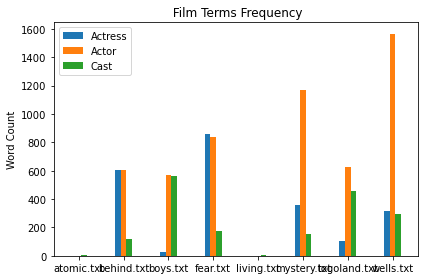

In [29]:
actress_id = vocabulary.index('she')
actor_id = vocabulary.index('he')
cast_id = vocabulary.index('they')

actress_counts = document_term_matrix[:, actress_id]
actor_counts = document_term_matrix[:, actor_id]
cast_counts = document_term_matrix[:, cast_id]
print("Actress: " + str(actress_counts))
print("Actor: " + str(actor_counts))
print("Cast: " + str(cast_counts))
import matplotlib.pyplot as plt

x = np.arange(len(titles))
width = 1/(len(titles))

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, actress_counts, width, label='Actress')
rects2 = ax.bar(x, actor_counts, width, label='Actor')
rects3 = ax.bar(x + width, cast_counts, width, label='Cast')


ax.set_ylabel('Word Count')
ax.set_title(' Film Terms Frequency')
ax.set_xticks(x)
ax.set_xticklabels(titles)
ax.legend()

fig.tight_layout()

plt.show()

## Stage Five: Calculate the Euclidean distance between the documents, using two key words as the point of comparison

Note: Nested four-loop compares and helps to avoid redundancy (loop logic solutions).

Euclidean distance's use allows for "calculating the distance between two documents in a space, ... looks at the exact coordinates of the two documents: it connects them with a straight line, ...and returns the length of that line" (Karsdopp, Kestemont, Riddell 100). As a result, the comparisons or calculated distances between supplied .txt brought interest and allowed comparisons to take place.

In [30]:
def euclidean_distance(a, b):
    """Compute the Euclidean distance between two vectors.

    Note: ``numpy.linalg.norm(a - b)`` performs the
    same calculation using a slightly faster method.

    Arguments:
        a (numpy.ndarray): a vector of floats or ints.
        b (numpy.ndarray): a vector of floats or ints.

    Returns:
        float: The euclidean distance between vector a and b.

    Examples:
        >>> import numpy as np
        >>> a = np.array([1, 4, 2, 8])
        >>> b = np.array([2, 1, 4, 7])
        >>> round(euclidean_distance(a, b), 2)
        3.87

    """
    return np.sqrt(np.sum((a - b) ** 2))
vectors = []
for x in range(0, len(titles)):
    vectors.append([cast_counts[x],actor_counts[x]])

for x in range(0, len(vectors)):
    for y in range(x+1, len(vectors)):
        comparison = euclidean_distance(np.array(vectors[x]),np.array(vectors[y]))
        print(f'{titles[x]} vs {titles[y]}: {comparison}')

atomic.txt vs behind.txt: 610.5481144021329
atomic.txt vs boys.txt: 796.2223307594431
atomic.txt vs fear.txt: 853.9156867044895
atomic.txt vs living.txt: 0.0
atomic.txt vs mystery.txt: 1179.1000805699234
atomic.txt vs togoland.txt: 772.3535459878461
atomic.txt vs wells.txt: 1592.4437195706478
behind.txt vs boys.txt: 447.21918563496354
behind.txt vs fear.txt: 243.75602556654883
behind.txt vs living.txt: 610.5481144021329
behind.txt vs mystery.txt: 570.4752404793744
behind.txt vs togoland.txt: 339.0766874911928
behind.txt vs wells.txt: 981.902235459315
boys.txt vs fear.txt: 469.6658386555275
boys.txt vs living.txt: 796.2223307594431
boys.txt vs mystery.txt: 725.5542708853694
boys.txt vs togoland.txt: 123.54756169184401
boys.txt vs wells.txt: 1034.8434664237873
fear.txt vs living.txt: 853.9156867044895
fear.txt vs mystery.txt: 333.600059952033
fear.txt vs togoland.txt: 347.0014409191985
fear.txt vs wells.txt: 739.0027063549903
living.txt vs mystery.txt: 1179.1000805699234
living.txt vs to

## Pre - Bonus Stage:

Computation of a vector was introduced to enable more value within the Bonus Stage section to help choices of distant modeling, "def vector_len(v):" (Karsdopp, Kestemont, Riddell 99).

In [18]:
def vector_len(v):
    """Compute the length (or norm) of a vector."""
    return np.sqrt(np.sum(v ** 2))

# Bonus Stage: As a bonus challenge, consider trying one of the other types of distance modeling described in the text.

Cosine distance "is the well-known cosine  distance from geometry" and differs from Euclidean distance beyond two points importance and bring forth the impact of their identities in arrows/vectors "that find their offset in the space's origin" (Karsdopp, Kestemont, Riddell 100). 


## Cosine Distance (#1)

In [31]:
def cosine_distance(a, b):
    """Compute the cosine distance between two vectors.

    Arguments:
        a (numpy.ndarray): a vector of floats or ints.
        b (numpy.ndarray): a vector of floats or ints.

    Returns:
        float: cosine distance between vector a and b.

    Note:
        See also scipy.spatial.distance.cdist

    Examples:
        >>> import numpy as np
        >>> a = np.array([1, 4, 2, 8])
        >>> b = np.array([2, 1, 4, 7])
        >>> round(cosine_distance(a, b), 2)
        0.09

    """
    return 1 - np.dot(a, b) / (vector_len(a) * vector_len(b))


# %%
tc = cosine_distance(actor_counts, cast_counts)
print(f'actor - cast:       {tc:.2f}')

ttc = cosine_distance(actor_counts, actress_counts)
print(f'actor - actress: {ttc:.2f}')

ctc = cosine_distance(cast_counts, actress_counts)
print(f'cast - actress: {ctc:.2f}')

actor - cast:       0.25
actor - actress: 0.24
cast - actress: 0.55


## Cosine Distance (#2)

In [32]:
# %%
def cosine_distance(a, b):
    """Compute the cosine distance between two vectors.

    Arguments:
        a (numpy.ndarray): a vector of floats or ints.
        b (numpy.ndarray): a vector of floats or ints.

    Returns:
        float: cosine distance between vector a and b.

    Note:
        See also scipy.spatial.distance.cdist

    Examples:
        >>> import numpy as np
        >>> a = np.array([1, 4, 2, 8])
        >>> b = np.array([2, 1, 4, 7])
        >>> round(cosine_distance(a, b), 2)
        0.09

    """
    
    return 1 - np.dot(a, b) / (vector_len(a) * vector_len(b))


# %%
tc = cosine_distance(actor_counts, cast_counts)
print(f'actor - cast:       {tc:.2f}')

ttc = cosine_distance(actor_counts, actress_counts)
print(f'actor - actress: {ttc:.2f}')

ctc = cosine_distance(cast_counts, actress_counts)
print(f'cast - actress: {ctc:.2f}')


actor - cast:       0.25
actor - actress: 0.24
cast - actress: 0.55


## City Block Distance

City block distance (aka Manhattan distance/L1 distance) "is a metric which computes the distance between two  points in space as the sum of the absolute differences of their coordinates in  space" (Karsdopp, Kestemont, Riddell 102). In this code example, I "plotted the individual paths between the data  points" (104). and even though it is not used that frequently in text analysis, it "is a well-known distance function whose "inner workings" are not too hard to understand" (105). 

In [33]:
def city_block_distance(a, b):
    """Compute the city block distance between two vectors.

    Arguments:
        a (numpy.ndarray): a vector of floats or ints.
        b (numpy.ndarray): a vector of floats or ints.

    Returns:
        {int, float}: The city block distance between vector a and b.

    Examples:
        >>> import numpy as np
        >>> a = np.array([1, 4, 2, 8])
        >>> b = np.array([2, 1, 4, 7])
        >>> city_block_distance(a, b)
        7

    """
    return np.abs(a - b).sum()

In [34]:
tc = euclidean_distance(actor_counts, cast_counts)  
print(f'cast - actor: {tc:.2f}')  

ttc = euclidean_distance(they_counts, girl_counts)  
print(f'cast - actress: {ttc:.2f}') 

ctc = euclidean_distance(boy_counts, girl_counts) 
print(f'actor - actress: {ctc:.2f}') 


cast - actor: 1833.08
cast - actress: 1074.97
actor - actress: 1675.13
